# Tarea Semanal 11

#### Por Joaquín López Tramullas
---------------------------------------------------------------

### Ejercicio 1

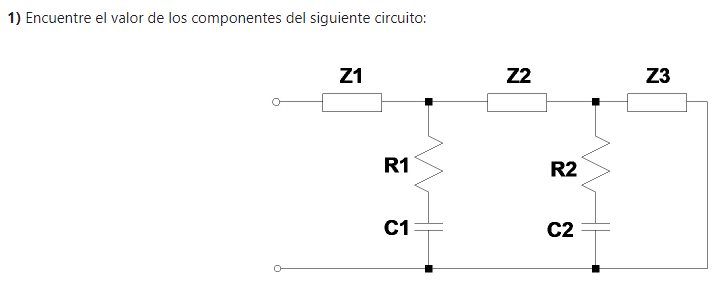

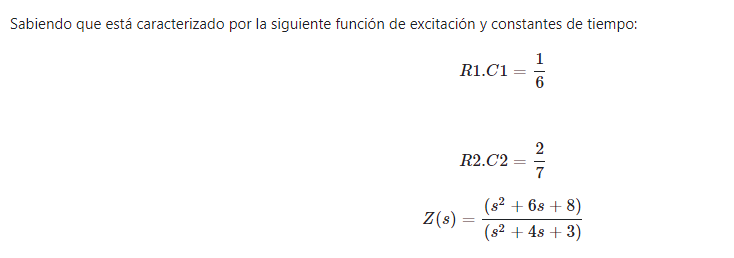

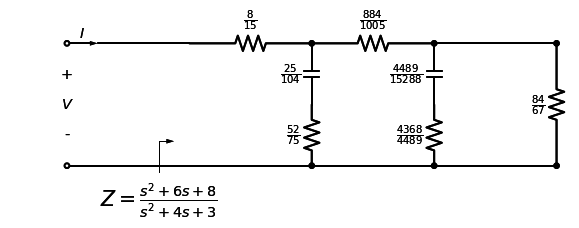

In [1]:
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor

#from splane import remover_valor

# Resolución simbólica

s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
ZZ = (s**2+6*s+8)/(s**2+4*s+3)

# Halle los valores de los componentes de la topología resultante.

# remoción parcial para que el siguiente tanque R1-C1 resuenen a 6 r/s

# Consignas del ejercicio: resonancias de dos tanques RC
sigma1 = 6
sigma2 = sp.Rational('7/2')

# La topología circuital guía las remociones:
    
Z2, Ra = tc2.remover_valor(ZZ, sigma1)

Y4, k1, R1, C1 = tc2.remover_polo_sigma(1/Z2, sigma1, isImpedance = False)

Z6, Rb = tc2.remover_valor(1/Y4, sigma2)

Y8, k2, R2, C2 = tc2.remover_polo_sigma(1/Z6, sigma2, isImpedance = False)

Rc = 1/Y8

# Dibujamos la red resultante:
    
d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          ZZ, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_serie(d, Resistor, Ra)

d = tc2.dibujar_tanque_RC_derivacion(d, R1, C1)
    
d = tc2.dibujar_elemento_serie(d, Resistor, Rb)

d = tc2.dibujar_tanque_RC_derivacion(d, R2, C2)
                        
d = tc2.dibujar_espacio_derivacion(d)

d = tc2.dibujar_elemento_derivacion(d, Resistor, Rc)

display(d)